In [89]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=2)
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)
from eden.converter.fasta import fasta_to_sequence
rfam_id = 'RF00005'
seqs = list(fasta_to_sequence(rfam_uri(rfam_id)))
print 'read %d sequences' % len(seqs)

Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF00005/alignment?acc=RF00005&format=fastau&download=0 HTTP/1.1" 200 90476
read 954 sequences


In [98]:
from eden.sequence_generator import SequenceGenerator
from eden.path import Vectorizer
sg = SequenceGenerator(n_differences=3, vectorizer=Vectorizer(complexity=5))
sg = sg.fit(seqs)

Positive data: Instances: 954 ; Features: 1048577 with an avg of 2256 features per instance
Negative data: Instances: 1908 ; Features: 1048577 with an avg of 2257 features per instance
Elapsed time: 10.5 secs


In [99]:
%%time
samples = sg.sample(seqs[:5], n_seqs=1, show_score=True, enhance=True)
for sample in samples:
    score, seq = sample
    print '%+.3f %s'%(score, seq)

AB003409.1/96-167
+3.785 GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA
+4.061 GGGCCCAUAGCUCAGUGGUAGAUUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA
AB009835.1/1-71
+1.701 CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA
+1.682 CAUUAGAUGACUGAAAGCUAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA
AB013372.1/8-81
+2.375 GCGCCCGUAGCUCAAUUGGAUAGAGCGUUUGACUACGGAUCAAAAGGUUAGGGGUUCGACUCCUCUCGGGCGCG
+3.112 GCGCCCGUAGCUCAAUUGGAUAGAGCGUUUGACUUCGGAUCAAAAGGUUUGGGGUUCGACUCCUCUCGGGCGCG
AB013373.1/3754-3825
+2.852 GCGGAAGUAGUUCAGUGGUAGAACACCACCUUGCCAAGGUGGGGGUCGCGGGUUCGAAUCCCGUCUUCCGCU
+3.333 GCGGAUGUAGUUCAGUGGUAGAACACCACCUGGCCAAGGUGGGGGUCGCGGGUUCGAAUCCCGGCUUCCGCU
AB017063.1/58819-58900
+3.131 GUGGACGUGCCGGAGUGGUUAUCGGGCAUGACUAGAAAUCAUGUGGGCUUUGCCCGCGCAGGUUCGAAUCCUGCCGUUCACG
+3.131 GUGGACGUGCCGGAGUGGUUAUCGGGCAUGACUAGAAAUCAUGUGGGCUUUGCCCGCGCAGGUUCGAAUCCUGCCGUUCACG
CPU times: user 1.52 s, sys: 2.77 s, total: 4.29 s
Wall time: 6.26 s


In [100]:
%%time
samples = sg.sample(seqs[:5], n_seqs=1, show_score=True, enhance=False)
for sample in samples:
    score, seq = sample
    print '%+.3f %s'%(score, seq)

AB003409.1/96-167
+3.785 GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA
+0.872 GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGCCACGAAUCCCAGUGGGUCCA
AB009835.1/1-71
+1.701 CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA
-0.414 CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUGAACCAUUUAAUAAUAAAUUAGCACUUAUUUCUAAUGA
AB013372.1/8-81
+2.375 GCGCCCGUAGCUCAAUUGGAUAGAGCGUUUGACUACGGAUCAAAAGGUUAGGGGUUCGACUCCUCUCGGGCGCG
+0.633 GCGCCCGUAGCUCAAUUGGAUAGAGCGUUUGACUACGGAUCAAAAGGUUAGGCCAUCGACUCCUCUCGGGCGCG
AB013373.1/3754-3825
+2.852 GCGGAAGUAGUUCAGUGGUAGAACACCACCUUGCCAAGGUGGGGGUCGCGGGUUCGAAUCCCGUCUUCCGCU
-0.253 GCGGAAGUAGUUCAGUGGUAGAACACCACCUUGCCAAGGUGGGGGUCGCGGGCACGAAUCCCGUCUUCCGCU
AB017063.1/58819-58900
+3.131 GUGGACGUGCCGGAGUGGUUAUCGGGCAUGACUAGAAAUCAUGUGGGCUUUGCCCGCGCAGGUUCGAAUCCUGCCGUUCACG
+0.785 GUGGACGUGCCGGAGUGGUUAUCGGGCAUGACUAGAAAUCAUGUGGGCUUUGCCCGCGCAAUAUCGAAUCCUGCCGUUCACG
CPU times: user 1.54 s, sys: 2.8 s, total: 4.34 s
Wall time: 6.35 s


In [101]:
num = 4
opts={'node_border':False, 'node_size':200, 'font_size':9, 'vertex_alpha':0.6,'title_key':'id',
               'vertex_color':'_labels_', 'colormap':'Set3', 'edge_label':None}
from eden.util.display import draw_graph_set

def make_header_seq(seqs):
    for i,seq in enumerate(seqs):
        yield ('>ID_%d'%i, seq) 

def pre_process(seqs):    
    from eden.converter.rna.rnafold import rnafold_to_eden
    graphs = rnafold_to_eden(seqs)
    return graphs

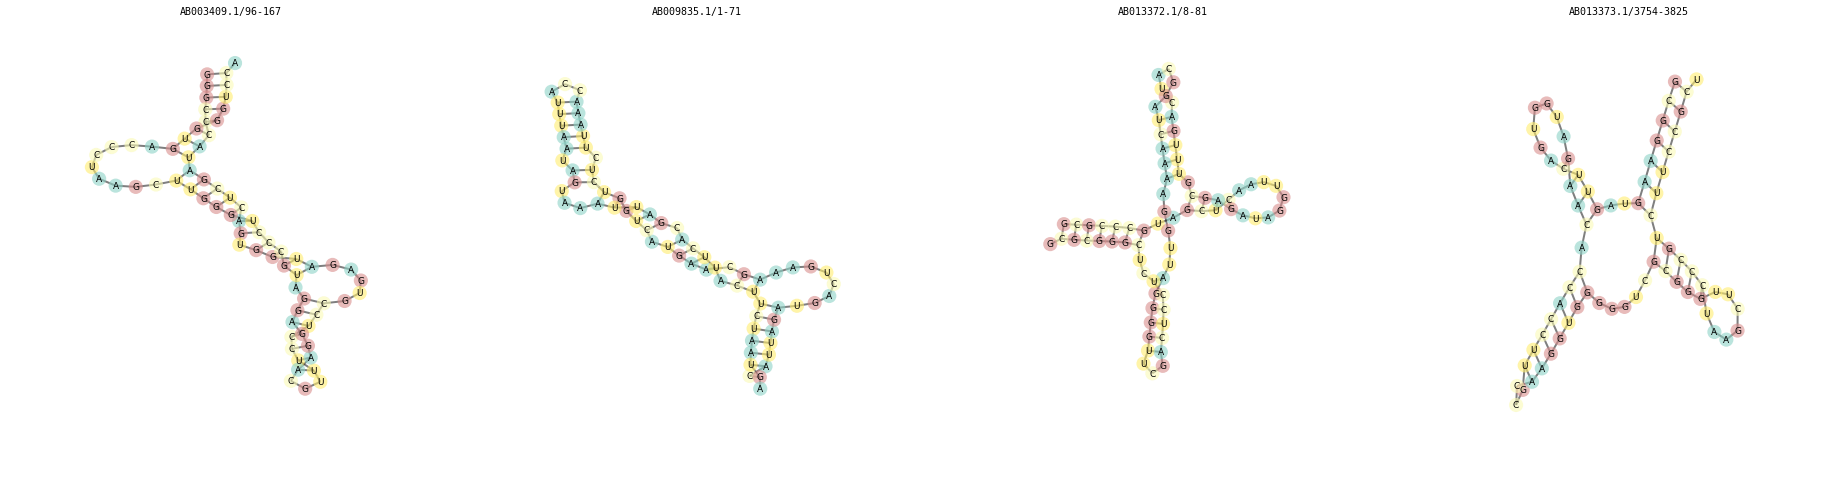

In [102]:
graphs = pre_process(seqs[:num])
draw_graph_set(graphs, n_graphs_per_line=4, size=8,**opts)

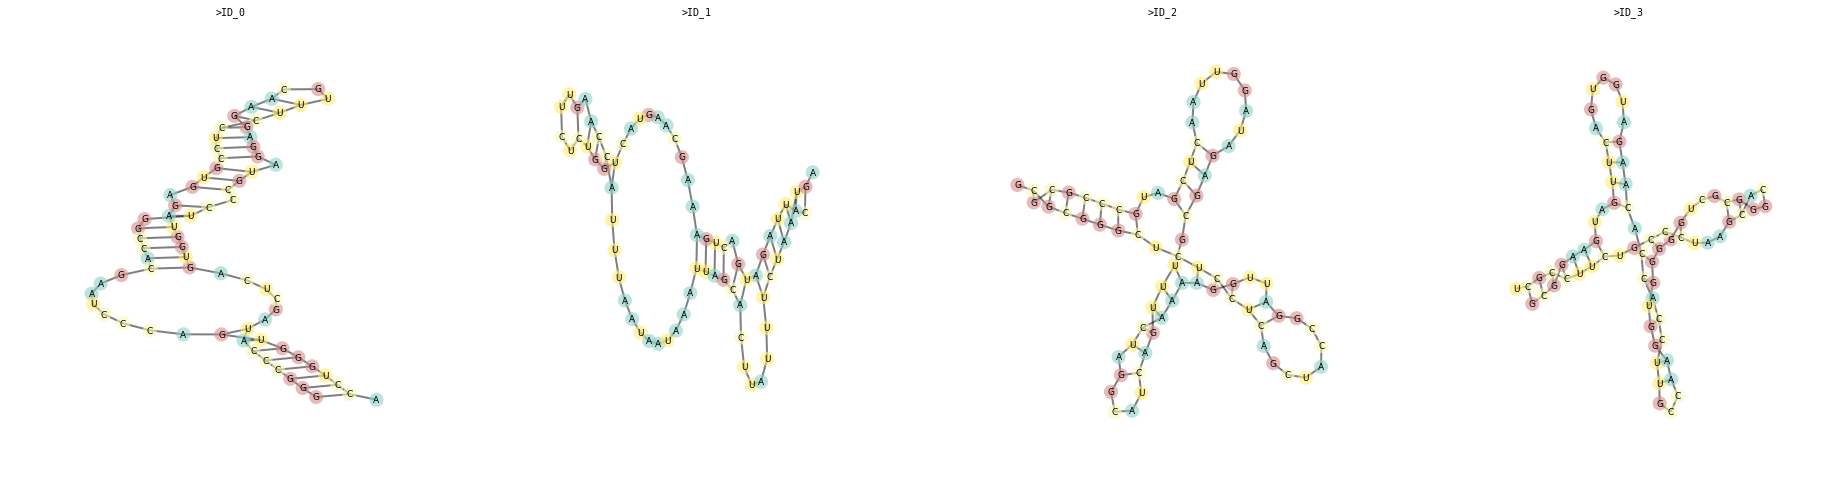

In [103]:
samples = sg.sample(seqs[:num], enhance=False, n_differences=3)
graphs = pre_process(make_header_seq(samples))
draw_graph_set(graphs, n_graphs_per_line=4, size=8,**opts)

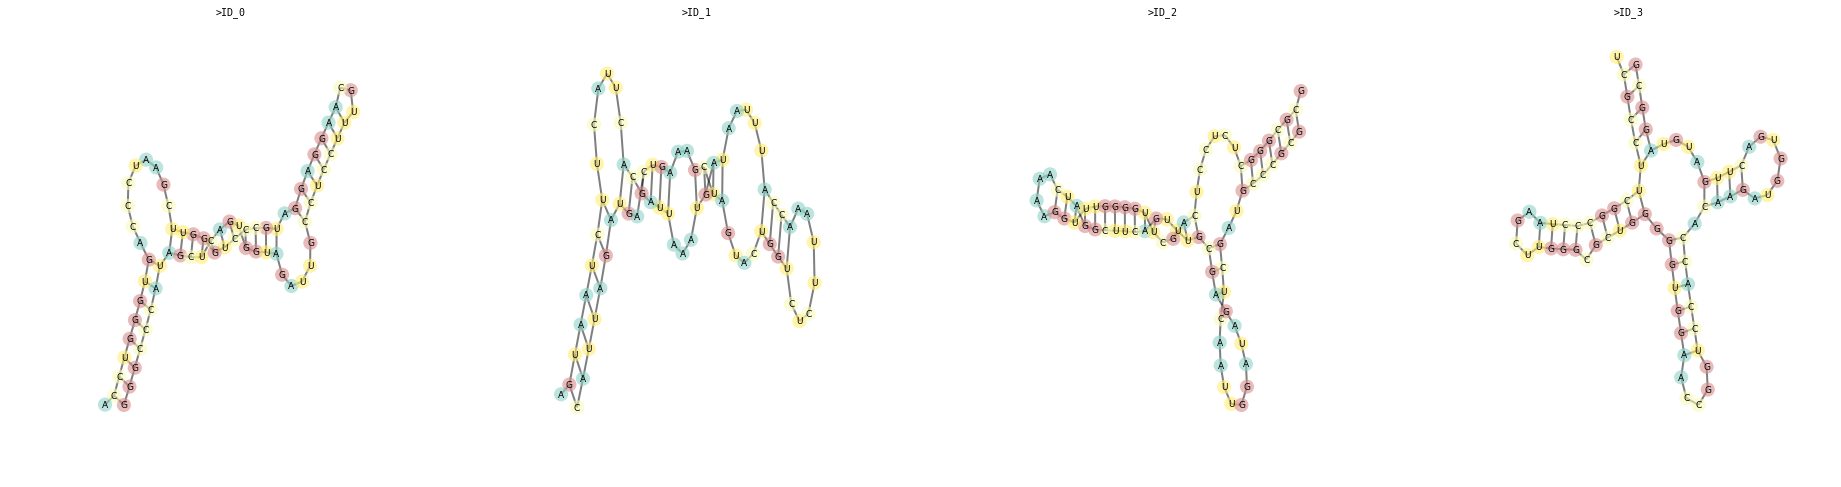

In [104]:
samples = sg.sample(seqs[:num], enhance=True, n_differences=3)
graphs = pre_process(make_header_seq(samples))
draw_graph_set(graphs, n_graphs_per_line=4, size=8,**opts)

---